In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

In [2]:
import addict
import copy
import datetime
import json
import meshio
import os
import warnings
import scipy
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from pprint import pprint
from ismember import ismember
import colorcet as cc
import matplotlib
import skies


In [3]:
run_name = datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
base_runs_folder = "./runs/"
output_path = os.path.join(base_runs_folder, run_name)
mesh_parameters_file_name = "./data/nankai_mesh_parameters.json"
skies.create_output_folder(base_runs_folder, output_path)
meshes = skies.read_meshes(mesh_parameters_file_name)


In [4]:
# Set initial conditions with accumulated slip
sources = addict.Dict()
sources.lon = np.array([235.779])
sources.lat = np.array([45.553])
sources.magnitude = np.array([10.0])
sources.slip_type = ["dip_slip"]
initial_slip_deficit = skies.get_synthetic_accumulated_slip(meshes[0], sources)
# initial_dip_slip_deficit = initial_slip_deficit[1::2]
initial_dip_slip_deficit = np.load("./data/nankai_high_resolution_tde_dip_slip_rates.npy")
total_coseismic_slip = np.zeros_like(initial_dip_slip_deficit)
# plt.plot(initial_dip_slip_deficit)

In [5]:
# KM2_TO_M2 = 1e6  # kilometers squared to meters squared


# def plot_event_clean(
#     event,
#     meshes,
#     pre_event_slip_deficit,
#     probability,
#     post_event_slip_deficit,
#     t,
#     iteration_step,
# ):
#     # Plot distances from current event hypocenter triangle
#     plt.figure(figsize=(15, 5))

#     # Plot pre-earthquake slip deficit
#     plt.subplot(1, 3, 1)
#     pc = skies.plot_meshes(meshes, pre_event_slip_deficit, plt.gca(), "magma_r")
#     plt.colorbar(pc, label="initial slip deficit (m)")
#     plt.plot(meshes[0].x_perimeter, meshes[0].y_perimeter, "-k")
#     plt.title(f"pre-earthquake slip deficit")

#     # Plot slip distribution
#     plt.subplot(1, 3, 2)
#     fill_value = np.zeros(meshes[0].n_tde)
#     fill_value[event.triangle_index] = event.slip
#     x_coords = meshes[0].meshio_object.points[:, 0]
#     y_coords = meshes[0].meshio_object.points[:, 1]
#     vertex_array = np.asarray(meshes[0].verts)
#     ax = plt.gca()
#     xy = np.c_[x_coords, y_coords]
#     verts = xy[vertex_array]
#     pc = matplotlib.collections.PolyCollection(
#         verts,
#         edgecolor=None,
#         cmap="gnuplot2_r",
#         linewidth=0,
#         alpha=1.0,
#     )
#     pc.set_array(fill_value)
#     ax.add_collection(pc)
#     ax.autoscale()
#     plt.gca().set_aspect("equal")
#     plt.plot(meshes[0].x_perimeter, meshes[0].y_perimeter, "-k")
#     plt.colorbar(pc, label="slip (m)")
#     plt.title(f"M = {event.moment_magnitude[0]:0.3}")

#     plt.subplot(1, 3, 3)
#     pc = skies.plot_meshes(meshes, post_event_slip_deficit, plt.gca(), "magma_r")
#     plt.colorbar(pc, label="slip deficit (m)")
#     plt.plot(meshes[0].x_perimeter, meshes[0].y_perimeter, "-k")
#     plt.title(f"post-earthquake slip deficit")

#     # plt.suptitle(f"{iteration_step=}, {t=}")
#     plt.show()


# def inpolygon(xq, yq, xv, yv):
#     shape = xq.shape
#     xq = xq.reshape(-1)
#     yq = yq.reshape(-1)
#     xv = xv.reshape(-1)
#     yv = yv.reshape(-1)
#     q = [(xq[i], yq[i]) for i in range(xq.shape[0])]
#     p = matplotlib.path.Path([(xv[i], yv[i]) for i in range(xv.shape[0])])
#     return p.contains_points(q).reshape(shape)


# def rbf_interpolate(fill_value):
#     # Observation coordinates and data
#     x_vec = np.linspace(231, 239, N_GRID_X)
#     y_vec = np.linspace(38, 52, N_GRID_Y)
#     x_mat, y_mat = np.meshgrid(x_vec, y_vec)
#     y_mat = y_mat
#     centroids_lon = meshes[0].centroids[:, 0]
#     centroids_lat = meshes[0].centroids[:, 1]
#     centroids_val = fill_value

#     # Package for RBFInterpolator
#     xgrid = np.stack((x_mat, y_mat))
#     xflat = xgrid.reshape(2, -1).T
#     xobs = np.vstack((centroids_lon, centroids_lat)).T
#     yobs = centroids_val
#     yflat = scipy.interpolate.RBFInterpolator(
#         xobs, yobs, kernel="cubic", smoothing=0.01, epsilon=1.5
#     )(xflat)
#     ygrid = yflat.reshape(N_GRID_X, N_GRID_Y)
#     return xgrid, ygrid


# def rbf_interpolate2(fill_value):
#     # Observation coordinates and data
#     # params.min_longitude = 130.0
#     # params.max_longitude = 140.0
#     # params.min_latitude = 30.0
#     # params.max_latitude = 37.0
#     x_vec = np.linspace(130, 140, N_GRID_X)
#     y_vec = np.linspace(30, 37, N_GRID_Y)
#     x_mat, y_mat = np.meshgrid(x_vec, y_vec)
#     y_mat = y_mat
#     centroids_lon = meshes[0].centroids[:, 0]
#     centroids_lat = meshes[0].centroids[:, 1]
#     centroids_val = fill_value

#     # Package for RBFInterpolator
#     xgrid = np.stack((x_mat, y_mat))
#     xflat = xgrid.reshape(2, -1).T
#     xobs = np.vstack((centroids_lon, centroids_lat)).T
#     yobs = centroids_val
#     # yflat = scipy.interpolate.RBFInterpolator(
#     #     xobs, yobs, kernel="cubic", smoothing=0.01, epsilon=1.5
#     # )(xflat)

#     yflat = scipy.interpolate.RBFInterpolator(
#         xobs, yobs, kernel="cubic", smoothing=0.00, epsilon=1.0
#     )(xflat)
#     ygrid = yflat.reshape(N_GRID_X, N_GRID_Y)
#     return xgrid, ygrid


In [6]:
# def plot_meshes(meshes, fill_value, ax):
#     for i in range(len(meshes)):
#         x_coords = meshes[i].meshio_object.points[:, 0]
#         y_coords = meshes[i].meshio_object.points[:, 1]
#         vertex_array = np.asarray(meshes[i].verts)

#         if not ax:
#             ax = plt.gca()
#         xy = np.c_[x_coords, y_coords]
#         verts = xy[vertex_array]
#         pc = matplotlib.collections.PolyCollection(
#             verts,
#             edgecolor="k",
#             cmap="plasma",
#             linewidth=0.1,
#             alpha=1.0,
#         )
#         pc.set_array(fill_value)
#         ax.add_collection(pc)
#         ax.autoscale()
#         plt.gca().set_aspect("equal", adjustable="box")
#         return pc

# t = 0
# N_GRID_X = 500
# N_GRID_Y = 500
# plt.plot(initial_slip_deficit)
pre_event_slip_deficit = initial_dip_slip_deficit

# plt.figure(figsize=(12, 6))
# for i in range(1):

#     # Only go through the event generation process of there is positive slip deficit somewhere
#     if 1 > 0:
#         # Generate event
#         location_probability = skies.get_location_probability(pre_event_slip_deficit)
#         event = skies.create_event(meshes, location_probability)
#         total_coseismic_slip += event.slip_all_elements
#         post_event_slip_deficit = pre_event_slip_deficit - event.slip_all_elements

#         # Mesh plots
#         plt.figure(figsize=(6, 4))
#         plt.scatter(meshes[0].centroids[:, 0], meshes[0].centroids[:, 1], c=pre_event_slip_deficit, s=2)
#         plt.colorbar()
#         plt.title("pre-event slip deficit")
#         plt.show()

#         plt.figure(figsize=(6, 4))
#         plt.scatter(meshes[0].centroids[:, 0], meshes[0].centroids[:, 1], c=event.slip_all_elements, s=2)
#         plt.colorbar()

#         # pc = plot_meshes(meshes, event.slip_all_elements, plt.gca())
#         plt.title("event slip")
#         plt.show()

#         plt.figure(figsize=(6, 4))
#         plt.scatter(meshes[0].centroids[:, 0], meshes[0].centroids[:, 1], c=post_event_slip_deficit, s=2)
#         plt.colorbar()
#         plt.title("post-event slip deficit")
#         plt.show()



In [8]:
location_probability = skies.get_location_probability(pre_event_slip_deficit)
event = skies.create_event(meshes, location_probability)

event.hypocenter_longitude = 134.0
event.hypocenter_latitude = 32.5
event.hypocenter_depth = 10.0
event.moment_magnitude = 8.0
event.shear_modulus = 3e10
event.area_scaling = 1.2

event = skies.get_event_area_slip_hypocenter(meshes[0], event)

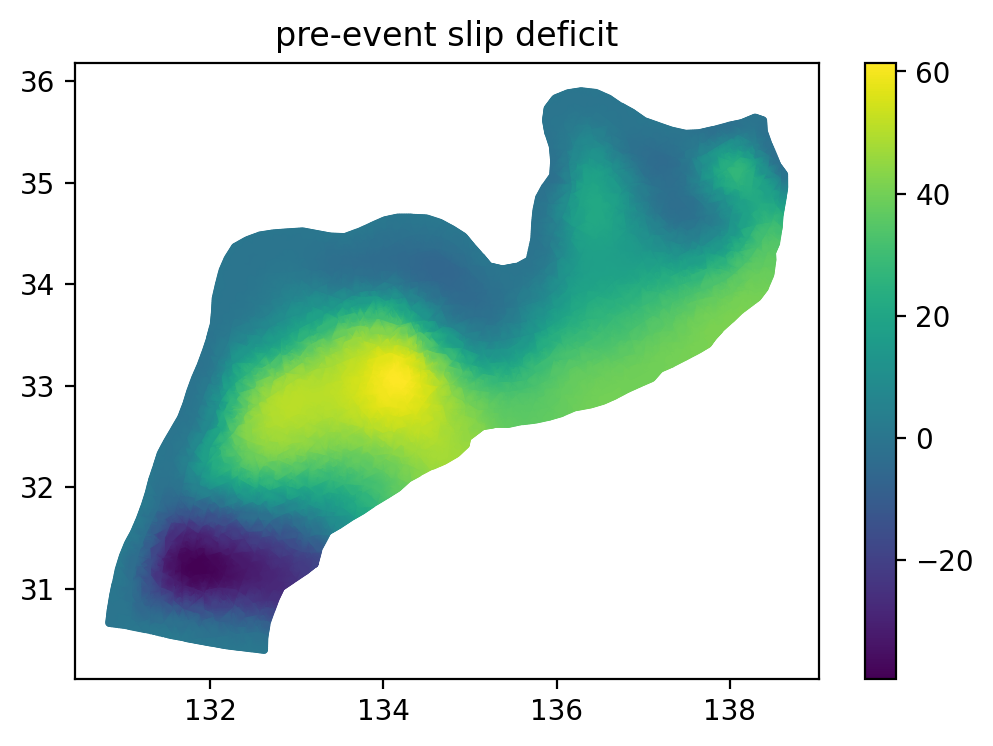

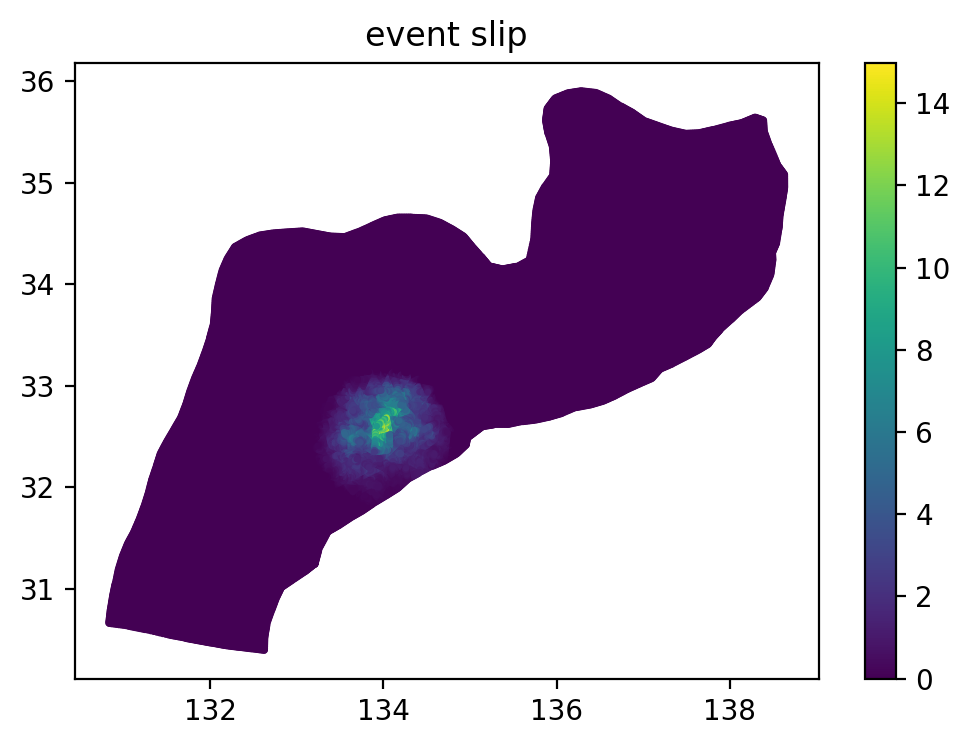

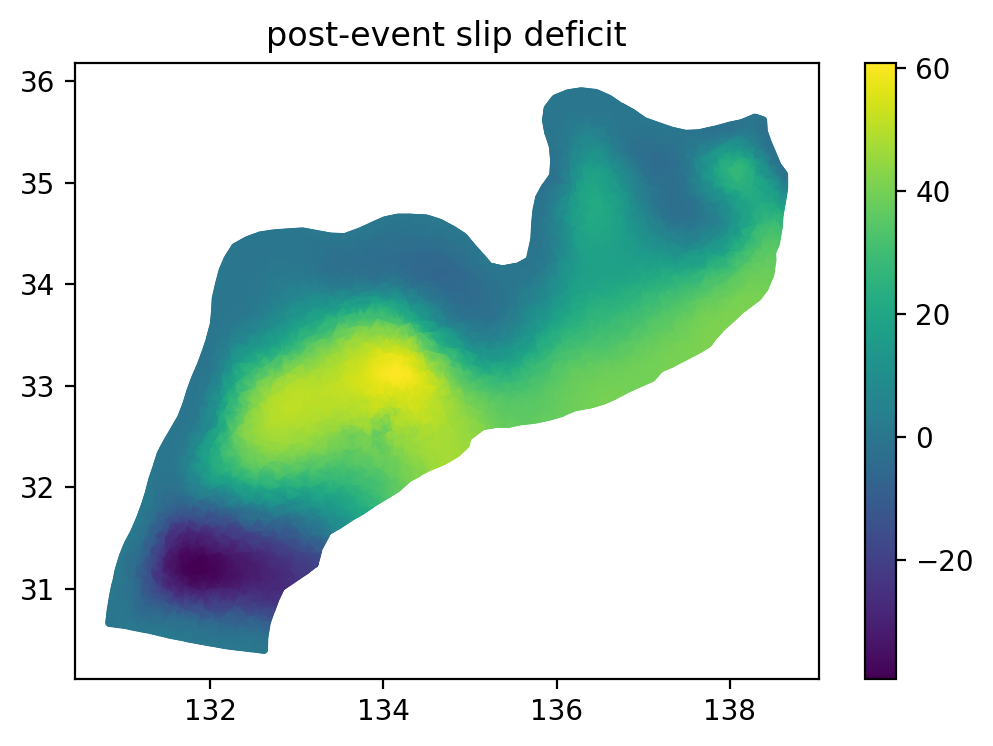

In [9]:
post_event_slip_deficit = pre_event_slip_deficit - event.slip_all_elements


plt.figure(figsize=(6, 4))
plt.scatter(
    meshes[0].centroids[:, 0], meshes[0].centroids[:, 1], c=pre_event_slip_deficit, s=2
)
plt.colorbar()
plt.title("pre-event slip deficit")
plt.show()


plt.figure(figsize=(6, 4))
plt.scatter(
    meshes[0].centroids[:, 0], meshes[0].centroids[:, 1], c=event.slip_all_elements, s=2
)
plt.colorbar()
plt.title("event slip")
plt.show()



plt.figure(figsize=(6, 4))
plt.scatter(
    meshes[0].centroids[:, 0], meshes[0].centroids[:, 1], c=post_event_slip_deficit, s=2
)
plt.colorbar()
plt.title("post-event slip deficit")
plt.show()


In [12]:
# Save relevant fields to a .npz file
np.savez(
    "skies_sign_step_erosion_figures_nankai.npz",
    name1=pre_event_slip_deficit,
    name2=event.slip_all_elements,
    name3=post_event_slip_deficit,
    name4=meshes[0].areas,
)

data = np.load("skies_sign_step_erosion_figures_nankai.npz")
print(data["name1"])
print(data["name2"])
print(data["name3"])
print(data["name4"])


[21.54143544 21.45942757 21.82825051 ... -0.53755491 -0.56065981
 -0.45986649]
[0. 0. 0. ... 0. 0. 0.]
[21.54143544 21.45942757 21.82825051 ... -0.53755491 -0.56065981
 -0.45986649]
[1608556.25189743 1608849.646951   1609120.60922733 ... 1810464.77220552
 1810283.76864549 1810789.64038059]


In [11]:
meshes[0].areas

array([1608556.25189743, 1608849.646951  , 1609120.60922733, ...,
       1810464.77220552, 1810283.76864549, 1810789.64038059])